In [1]:
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd
import geoviews as gv
import holoviews as hv
from geoviews import tile_sources as gvts
from proj_module import count_earthquakes_in_country_in_year, convert_df_to_gdf

c:\Users\ashri\anaconda3\envs\Monash\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:

# Specify the path to your CSV file
csv_path = (".\output_data\earthquakes_2010_2023.csv")

# Open the CSV file
with open(csv_path, 'r') as csv_file:

    # Create a CSV reader
    csv_reader = csv.reader(csv_file)

    #reading the header
    csv_header = next(csv_reader)

    #converting the data in the csv_reader to a list
    eq_data = list(csv_reader)

#creating a dataframe       
eq_data_df = pd.DataFrame(eq_data, columns = csv_header)

# displaying the dataframe
eq_data_df.head()

,bin_id,bin_centre_lat,bin_centre_lon,quake_lat,quake_lon,place,country,magnitude,depth,utm,date,year,month,day,time
0,2_33,-65.0,155.0,-62.5813,155.4551,Balleny Islands region,offshore,5.4,10.0,1635872446657,"(2021, 11, 2)",2021,11,2,17:00:46
1,3_15,-55.0,-25.0,-58.0284,-25.2678,South Sandwich Islands region,offshore,6.0,22.0,1635724968965,"(2021, 11, 1)",2021,11,1,00:02:48
2,3_15,-55.0,-25.0,-58.5787,-23.3634,South Sandwich Islands region,offshore,5.4,23.5,1636211601649,"(2021, 11, 6)",2021,11,6,15:13:21
3,3_15,-55.0,-25.0,-57.9361,-25.6751,South Sandwich Islands region,offshore,5.3,48.92,1637544172350,"(2021, 11, 22)",2021,11,22,01:22:52
4,3_15,-55.0,-25.0,-57.8508,-25.4189,South Sandwich Islands region,offshore,5.2,50.91,1636311023404,"(2021, 11, 7)",2021,11,7,18:50:23


In [3]:
#removing the offshore countries to look at only the data on land

on_land_df= eq_data_df[(eq_data_df["country"] != "offshore")]
                    
on_land_df.head()

,bin_id,bin_centre_lat,bin_centre_lon,quake_lat,quake_lon,place,country,magnitude,depth,utm,date,year,month,day,time
35,6_16,-25.0,-15.0,-26.5824,-13.7152,southern Mid-Atlantic Ridge,Indonesia,5.4,10.0,1636850856923,"(2021, 11, 14)",2021,11,14,00:47:36
36,6_29,-25.0,115.0,-20.9319,119.8141,"27 km NNE of Marble Bar, Australia",Indonesia,5.3,10.0,1636808754157,"(2021, 11, 13)",2021,11,13,13:05:54
37,6_34,-25.0,165.0,-21.4749,168.9087,"106 km E of Tadine, New Caledonia",Indonesia,5.1,10.0,1635724845681,"(2021, 11, 1)",2021,11,1,00:00:45
38,6_35,-25.0,175.0,-22.7728,171.6065,southeast of the Loyalty Islands,Indonesia,5.3,10.0,1635820087681,"(2021, 11, 2)",2021,11,2,02:28:07
44,7_10,-15.0,-75.0,-12.0155,-77.4324,"34 km W of Callao, Peru",Peru,5.1,61.65,1638081150797,"(2021, 11, 28)",2021,11,28,06:32:30


In [4]:
# Group by country and year and count the frequency of earthquakes
country_data = on_land_df.groupby(["country", "year"]).count()["magnitude"]

# Create a DataFrame from the grouped data
country_data_df = pd.DataFrame(country_data)
country_data_df.reset_index(inplace=True)

# Pivot the DataFrame to have years as columns
pivoted_data = country_data_df.pivot(index="country", columns="year", values="magnitude")

# Sort the DataFrame by country
pivoted_data.sort_index(inplace=True)

# Replace NaN by 0
pivoted_data.fillna(0, inplace=True)

# Calculate total earthquake counts
pivoted_data["Total"] = pivoted_data.sum(axis=1)

# Sort by total earthquake counts in descending order
pivoted_data.sort_values(by="Total", ascending=False, inplace=True)

pivoted_data.head(10)


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
country,,,,,,,,,,,,,,,
Indonesia,174.0,163.0,149.0,133.0,153.0,142.0,128.0,128.0,197.0,237.0,127.0,158.0,152.0,157.0,2198.0
Papua New Guinea,73.0,66.0,42.0,47.0,56.0,74.0,50.0,38.0,126.0,66.0,42.0,53.0,48.0,64.0,845.0
Japan,20.0,141.0,48.0,37.0,31.0,22.0,47.0,22.0,36.0,20.0,23.0,27.0,22.0,25.0,521.0
Solomon Islands,48.0,24.0,32.0,93.0,38.0,24.0,53.0,36.0,23.0,26.0,23.0,31.0,32.0,33.0,516.0
Chile,198.0,37.0,28.0,10.0,19.0,61.0,37.0,20.0,8.0,13.0,11.0,12.0,10.0,16.0,480.0
Philippines,33.0,26.0,38.0,29.0,22.0,16.0,33.0,26.0,14.0,55.0,25.0,13.0,28.0,60.0,418.0
United States,27.0,26.0,11.0,12.0,24.0,10.0,20.0,23.0,70.0,31.0,42.0,22.0,14.0,22.0,354.0
China,29.0,17.0,21.0,29.0,21.0,13.0,20.0,17.0,26.0,19.0,21.0,39.0,26.0,19.0,317.0
Iran,13.0,14.0,26.0,24.0,23.0,6.0,3.0,18.0,25.0,11.0,17.0,16.0,14.0,14.0,224.0


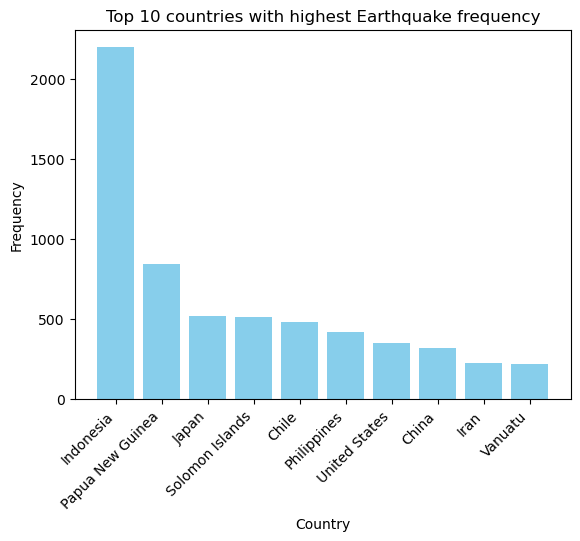

In [5]:
#getting the top 10 countries to plot a bar graph
top_10_countries = pivoted_data.head(10)

#defining x and y values
x_values= top_10_countries.index
y_values =top_10_countries["Total"]
plt.bar(x_values, y_values, color = 'skyblue')
#set the title, labels and tick locations
plt.xticks(rotation=45, ha = "right")
plt.title("Top 10 countries with highest Earthquake frequency")
plt.xlabel("Country")
plt.ylabel("Frequency")
#displaying the map
plt.show()

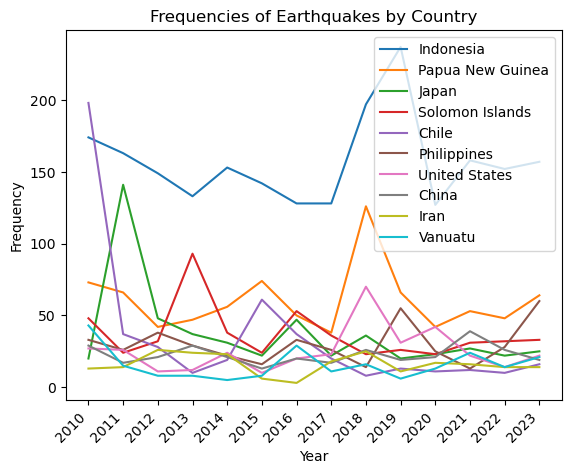

In [16]:

# Get the years from the columns of the DataFrame
years = top_10_countries.columns[:-1]

# Plotting
for country in top_10_countries.index:
    frequencies = top_10_countries.loc[country, years]
    plt.plot(years, frequencies, label=country)

# Customize the plot
plt.title('Frequencies of Earthquakes by Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()

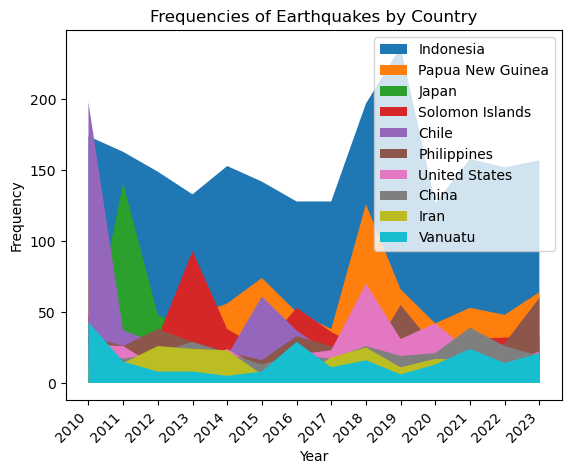

In [21]:
years = top_10_countries.columns[:-1]

# Plotting
fig, ax = plt.subplots()

# Iterate over each country
for country in top_10_countries.index:
    frequencies = top_10_countries.loc[country, years]
    ax.fill_between(years, frequencies, label=country)

# Customize the plot
plt.title('Frequencies of Earthquakes by Country')
plt.xticks(rotation=45, ha= 'right')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


# Buffered locations

In [25]:
ext_countries_path = Path("./output_data/buffered_countries.shp")
ext_countries = gpd.read_file(ext_countries_path)
ext_countries.head()

,NAME,ABBREV,BRK_A3,POP_EST,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,geometry
0,Indonesia,Indo.,IDN,270625568.0,2019,1119190,2019,4. Emerging region: MIKT,4. Lower middle income,Asia,South-Eastern Asia,"POLYGON ((124.78292 -12.12962, 124.71585 -12.1..."
1,Malaysia,Malay.,MYS,31949777.0,2019,364681,2019,6. Developing region,3. Upper middle income,Asia,South-Eastern Asia,"MULTIPOLYGON (((107.82357 0.80340, 107.80023 0..."
2,Chile,Chile,CHL,18952038.0,2019,282318,2019,5. Emerging region: G20,3. Upper middle income,South America,South America,"MULTIPOLYGON (((-77.65526 -48.86072, -77.65824..."
3,Bolivia,Bolivia,BOL,11513100.0,2019,40895,2019,5. Emerging region: G20,4. Lower middle income,South America,South America,"POLYGON ((-71.35174 -18.36461, -71.44455 -18.2..."
4,Peru,Peru,PER,32510453.0,2019,226848,2019,5. Emerging region: G20,3. Upper middle income,South America,South America,"POLYGON ((-83.32799 -4.51125, -83.32367 -4.331..."


In [26]:
crs_code = "EPSG:4326"
from shapely.geometry import Point

def convert_df_to_gdf(dataframe, lon_column, lat_column, crs_code):
    geometry = [Point(xy) for xy in zip(dataframe[lon_column], dataframe[lat_column])]
    gdf = gpd.GeoDataFrame(dataframe, geometry=geometry, crs=crs_code)
    return gdf

In [33]:
geo_df = convert_df_to_gdf(eq_data_df, 'quake_lon','quake_lat', crs_code)

geo_df.head()

,bin_id,bin_centre_lat,bin_centre_lon,quake_lat,quake_lon,place,country,magnitude,depth,utm,date,year,month,day,time,geometry
0,2_33,-65.0,155.0,-62.5813,155.4551,Balleny Islands region,offshore,5.4,10.0,1635872446657,"(2021, 11, 2)",2021,11,2,17:00:46,POINT (155.45510 -62.58130)
1,3_15,-55.0,-25.0,-58.0284,-25.2678,South Sandwich Islands region,offshore,6.0,22.0,1635724968965,"(2021, 11, 1)",2021,11,1,00:02:48,POINT (-25.26780 -58.02840)
2,3_15,-55.0,-25.0,-58.5787,-23.3634,South Sandwich Islands region,offshore,5.4,23.5,1636211601649,"(2021, 11, 6)",2021,11,6,15:13:21,POINT (-23.36340 -58.57870)
3,3_15,-55.0,-25.0,-57.9361,-25.6751,South Sandwich Islands region,offshore,5.3,48.92,1637544172350,"(2021, 11, 22)",2021,11,22,01:22:52,POINT (-25.67510 -57.93610)
4,3_15,-55.0,-25.0,-57.8508,-25.4189,South Sandwich Islands region,offshore,5.2,50.91,1636311023404,"(2021, 11, 7)",2021,11,7,18:50:23,POINT (-25.41890 -57.85080)


In [41]:

def count_earthquakes_in_country_in_year(countries, earthquakes, year, extended_borders=False):
    earthquakes_in_year = earthquakes.loc[earthquakes["year"] == year]
    # #joined_gdf = gpd.sjoin(earthquakes_in_year, countries, how='inner', predicate='within')
    # joined_gdf = gpd.sjoin(earthquakes_in_year, countries, how='inner', op='within')

    # if extended_borders:
    #     buffered = " within 2deg border"
    # else:
    #     buffered = ""
    
    # # Count the number of points within each polygon
    # earthquake_counts = pd.DataFrame(joined_gdf.groupby('NAME').size()).rename(columns = {0: f"Earthquake count{buffered} {year}"})
    return earthquakes_in_year #earthquake_counts

In [43]:
import numpy as np

buffered_dfs =[]
years = np.arange(2010, 2024, 1)
for year in years:
    eq_count_df = count_earthquakes_in_country_in_year(ext_countries, geo_df, year, extended_borders = True)
    
    
    #buffered_dfs.append(eq_count_df)
    print(eq_count_df.head(10))

#returns the df with 2019 count for each country
# country_count_df = pd.concat(buffered_dfs, axis=1).fillna(0)
# country_count_df['Total'] = country_count_df.sum(axis=1)

# country_count_df

Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, country, magnitude, depth, utm, date, year, month, day, time, geometry]
Index: []
Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, country, magnitude, depth, utm, date, year, month, day, time, geometry]
Index: []
Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, country, magnitude, depth, utm, date, year, month, day, time, geometry]
Index: []
Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, country, magnitude, depth, utm, date, year, month, day, time, geometry]
Index: []
Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, country, magnitude, depth, utm, date, year, month, day, time, geometry]
Index: []
Empty GeoDataFrame
Columns: [bin_id, bin_centre_lat, bin_centre_lon, quake_lat, quake_lon, place, co

In [30]:
# look at by regional spatial distribution of number of earthquakes
n_earthquakes_by_grid = eq_data_df.groupby("bin_id").size().reset_index(name='count').set_index("bin_id")

n_earthquakes_by_grid.hvplot.points('bin_lon', 'bin_lat', 
                             title = "Cumulative Earthquakes with Magnitude >5 from 2010-2023",
                             #tiles = "EsriOceanBase",
                             cmap="Inferno",
                             c='count', 
                             size='count',
                             frame_width=700,
                             geo=True, 
                             coastline=True, 
                             clabel="Number of Earthquakes", 
                             global_extent=True)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['bin_lat']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html